In [0]:
!pip install pydrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 22.1MB/s 
  Running setup.py bdist_wheel for pydrive ... - \ done
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pydrive


In [0]:
download = drive.CreateFile({'id': '0B3P9oO5A3RvSNWw5X0c5R1hJRnc'})
download.GetContentFile('dataset-resized.zip')

In [0]:
!ls 

sample_data


In [0]:
!unzip dataset-resized.zip

Archive:  dataset-resized.zip
   creating: dataset-resized/
  inflating: dataset-resized/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/dataset-resized/
  inflating: __MACOSX/dataset-resized/._.DS_Store  
   creating: dataset-resized/cardboard/
  inflating: dataset-resized/cardboard/cardboard1.jpg  
  inflating: dataset-resized/cardboard/cardboard10.jpg  
  inflating: dataset-resized/cardboard/cardboard100.jpg  
  inflating: dataset-resized/cardboard/cardboard101.jpg  
  inflating: dataset-resized/cardboard/cardboard102.jpg  
  inflating: dataset-resized/cardboard/cardboard103.jpg  
  inflating: dataset-resized/cardboard/cardboard104.jpg  
  inflating: dataset-resized/cardboard/cardboard105.jpg  
  inflating: dataset-resized/cardboard/cardboard106.jpg  
  inflating: dataset-resized/cardboard/cardboard107.jpg  
  inflating: dataset-resized/cardboard/cardboard108.jpg  
  inflating: dataset-resized/cardboard/cardboard109.jpg  
  inflating: dataset-resized/cardboard/cardboard11.j

In [0]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import os
from os import walk
import numpy as np

mypath = 'dataset-resized/'
d = []
f = []
files = []
for (dirpath, dirnames, filenames) in walk(mypath):
  d.append(dirnames)

In [0]:
d = d[0]
d

['plastic', 'metal', 'trash', 'glass', 'paper', 'cardboard']

In [0]:
d

[]

In [0]:
mypath + directory + "/._trash101.jpg"

'__MACOSX/dataset-original/trash/._trash101.jpg'

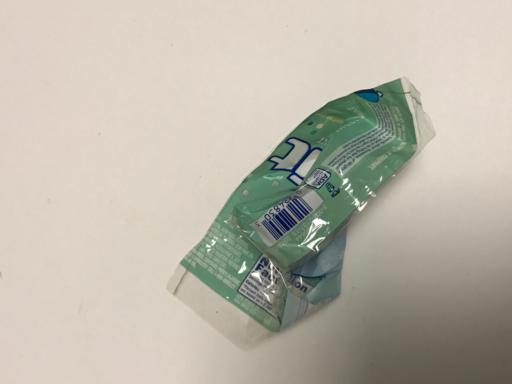

In [0]:
from IPython.display import Image
Image(filename = 'dataset-resized/trash/trash12.jpg')

In [0]:
files = []
for directory in d:
  for (dirpath, dirnames, filenames) in walk(mypath+directory):
    f.append(filenames)
  files.append(f)
  f = []

In [0]:
files = files.flatten()

In [0]:
f = files.tolist()

In [0]:
np.squeeze(files)

array([list(['plastic254.jpg', 'plastic64.jpg', 'plastic369.jpg', 'plastic76.jpg', 'plastic264.jpg', 'plastic46.jpg', 'plastic153.jpg', 'plastic482.jpg', 'plastic318.jpg', 'plastic93.jpg', 'plastic196.jpg', 'plastic359.jpg', 'plastic166.jpg', 'plastic148.jpg', 'plastic311.jpg', 'plastic341.jpg', 'plastic79.jpg', 'plastic350.jpg', 'plastic120.jpg', 'plastic160.jpg', 'plastic306.jpg', 'plastic408.jpg', 'plastic12.jpg', 'plastic66.jpg', 'plastic344.jpg', 'plastic351.jpg', 'plastic112.jpg', 'plastic68.jpg', 'plastic266.jpg', 'plastic129.jpg', 'plastic455.jpg', 'plastic321.jpg', 'plastic52.jpg', 'plastic329.jpg', 'plastic175.jpg', 'plastic312.jpg', 'plastic434.jpg', 'plastic104.jpg', 'plastic437.jpg', 'plastic287.jpg', 'plastic358.jpg', 'plastic281.jpg', 'plastic84.jpg', 'plastic103.jpg', 'plastic163.jpg', 'plastic404.jpg', 'plastic399.jpg', 'plastic32.jpg', 'plastic335.jpg', 'plastic139.jpg', 'plastic109.jpg', 'plastic195.jpg', 'plastic29.jpg', 'plastic457.jpg', 'plastic62.jpg', 'plastic45

In [0]:
files.shape

(6, 1)

In [0]:
f[1][0]

'metal396.jpg'

In [0]:
train = []
test = []
for i in range(6):
  train.append(f[i][:-10])
  test.append(f[i][-10:])

In [0]:
test

In [0]:
d

['plastic', 'metal', 'glass', 'cardboard', 'paper', 'trash']

In [0]:
label = []

In [0]:
label.append([1,0,0,0,0,0])
label.append([0,1,0,0,0,0])
label.append([0,0,1,0,0,0])
label.append([0,0,0,1,0,0])
label.append([0,0,0,0,1,0])
label.append([0,0,0,0,0,1])

In [0]:
from random import randint
import cv2
def load_image(path):
    img = Image.open(path)
    #img=cv2.Canny(img,100,200)
    return img
def preprocess_image(cv_img):
    cv_img = cv_img.resize((224,224))
    c=1
    img = np.array(cv_img)
    img = (img ) / 255
    r=randint(0,12)
    #print(img.shape)
#     try:  
#       if(img.shape[2]==3):
#         img=np.dot(img[...,:3], [0.299, 0.587, 0.114])
#     except:
#       c=0
    return np.array(img)
def load_images(path,batch,training = True):
  labels = []
  images = []

  for i in range(6):
    print(i)
    l=np.random.permutation(len(train[i])-1)
    for j in range(batch//6):
      try:    
        if training:
          img = load_image(mypath + d[i] +'/'+ train[i][l[j]])  
        else:
          img = load_image(mypath + d[i] +'/'+ test[i][l[j]])
        images.append(preprocess_image(img))
        labels.append(label[i])
      except:
        continue
  return np.asarray(images),np.asarray(labels)


In [0]:
x_train,y_train = load_images(mypath,2340)


0
1
2
3
4
5


In [0]:

model = ResNet50(weights='imagenet')

In [0]:


x = model.output

x = Dense(512, activation="relu")(x)
predictions = Dense(6, activation="softmax")(x)

In [0]:
model_final = Model(input = model.input, output = predictions)
model_final.compile(loss = "categorical_crossentropy", optimizer = 'adam', metrics=["accuracy"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


Epoch 1/1
2076/2076 [==============================] - 76s 37ms/step - loss: 1.6426 - acc: 0.4099


In [0]:
x_test,y_test = load_images(mypath,50,training = 'False')

In [0]:
import matplotlib.pyplot as plt
l = []
a = []
loss = []
acc = []
for i in range(20):
  history = model_final.fit(x_train,y_train,batch_size=32,validation_data=(x_test,y_test))


In [0]:
model_final.save_weights('waste.h5')

In [0]:
from google.colab import files
files.download('waste.h5')

In [0]:
!wget https://powercdn.s3.amazonaws.com/8_2014/ef564c48-86ca-42e5-9c88-f76ffcef4bf5.jpg

--2019-01-09 12:40:37--  https://powercdn.s3.amazonaws.com/8_2014/ef564c48-86ca-42e5-9c88-f76ffcef4bf5.jpg
Resolving powercdn.s3.amazonaws.com (powercdn.s3.amazonaws.com)... 52.218.36.209
Connecting to powercdn.s3.amazonaws.com (powercdn.s3.amazonaws.com)|52.218.36.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12389 (12K) [image/jpeg]
Saving to: ‘ef564c48-86ca-42e5-9c88-f76ffcef4bf5.jpg’

ef564c48-86ca-42e5- 100%[===================>]  12.10K  --.-KB/s    in 0s      

2019-01-09 12:40:37 (87.2 MB/s) - ‘ef564c48-86ca-42e5-9c88-f76ffcef4bf5.jpg’ saved [12389/12389]



In [0]:
np.asarray(img).shape

(224, 224, 3)

In [0]:
img = preprocess_image(load_image('ef564c48-86ca-42e5-9c88-f76ffcef4bf5.jpg'))

print(model_final.predict(np.expand_dims(np.asarray(img), axis =0)))

[[0.6553089  0.22491834 0.00357627 0.02020403 0.00837206 0.08762038]]
